# Decision (Classification) Trees

In [63]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [64]:
iris = datasets.load_iris(as_frame=True)
print(iris.DESCR)

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [65]:
seed = 42
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=seed) #change the max_depth and see the DT
tree_clf.fit(X, y)

#tree_clf = DecisionTreeClassifier(max_depth=5, random_state=seed) #change the max_depth and see the DT
#tree_clf.fit(X, y)

# Increasing the tree depth can improve accuracy by allowing the tree to capture more complex patterns in the data.
# But when a decision tree is too deep (deep trees), it may memorize the training data instead of learning general patterns (overfitting)

DecisionTreeClassifier(max_depth=2, random_state=42)

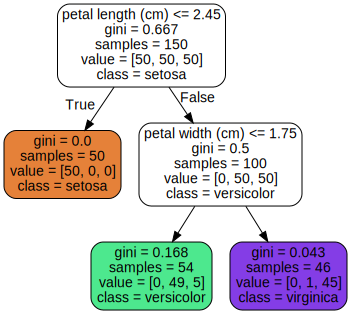

In [66]:
import os
from sklearn.tree import export_graphviz
from graphviz import Source

#print(tree_clf.tree_)
feature_names = []
export_graphviz(
    tree_clf,
    out_file="iris_tree.out",
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

if os.path.exists("iris_tree.out"):
  dot_source = Source.from_file("iris_tree.out")
  display(dot_source)
else:
  raise FileNotFoundError("File 'iris_tree.out' does not exist")

/usr/local/lib/python3.12/dist-packages/sklearn/inspection/_plot/decision_boundary.py:194: UserWarning: The following kwargs were not used by contour: 'features'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


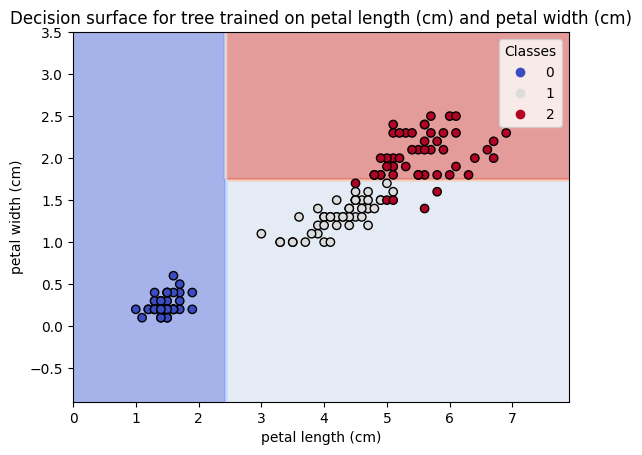

In [67]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

# Plotting the tree boundaries
disp = DecisionBoundaryDisplay.from_estimator(tree_clf,
                                              X,
                                              features=["petal length (cm)", "petal width (cm)"],
                                              response_method="predict",
                                              xlabel="petal length (cm)", ylabel="petal width (cm)",
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)

# Plotting the data points
scatter_plot = disp.ax_.scatter(X[:, 0], X[:, 1],
                 c=y, edgecolor="k",
                 cmap=plt.cm.coolwarm)

# Generate handles and labels automatically from the scatter plot colors
handles, labels = scatter_plot.legend_elements()

# Add the legend to the axes
disp.ax_.legend(handles, labels, title="Classes")

plt.title(f"Decision surface for tree trained on petal length (cm) and petal width (cm)")
plt.show()

In [70]:
id_to_label = {i:label for i, label in enumerate(iris.target_names)}

#Estimating class probabilities
y_pred_probs = tree_clf.predict_proba([[5, 1.5]]).round(3)
print("Class Probabilities for prediction:", y_pred_probs)

y_pred = tree_clf.predict([[5, 1.5]]) #flower with petal length 5cm and petal width 1.5cm
print(id_to_label.get(y_pred[0]), f" (Probability: {y_pred_probs.max()})")

Class Probabilities for prediction: [[0.    0.907 0.093]]
versicolor  (Probability: 0.907)
